# Machine Learning - Assignment II

In [163]:
#Name: Mwanje Musa
#Reg No: MAY22/MSC/1615U
#Programme: MSc. COMP (CS)

In [164]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
from six import StringIO
from io import StringIO 
import matplotlib.pyplot as plt

# (1) Create a decision tree for the following dataset. The objective is to predict the class category (loan approved or not).

In [165]:
df = pd.read_csv('assignment2.csv')
df.head()

,Age,Job,House,Credit,Loan Approved
0,Young,False,No,Fair,No
1,Young,False,No,Good,No
2,Young,True,No,Good,Yes
3,Young,True,Yes,Fair,Yes
4,Young,False,No,Fair,No


In [166]:
df.shape

(15, 5)

In [167]:
#Remove the independent features
X =df[["Age","Job","House", "Credit"]].values
X[0:5]

array([['Young', False, 'No', 'Fair'],
       ['Young', False, 'No', 'Good'],
       ['Young', True, 'No', 'Good'],
       ['Young', True, 'Yes', 'Fair'],
       ['Young', False, 'No', 'Fair']], dtype=object)

In [168]:
#The dependent features
y =df["Loan Approved"]
y[0:5]

0     No
1     No
2    Yes
3    Yes
4     No
Name: Loan Approved, dtype: object

In [169]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Young','Middle','Old'])
X[:,0] = le_sex.transform(X[:,0])

le_Job = preprocessing.LabelEncoder()
le_Job.fit([ False,True])
X[:,1] = le_Job.transform(X[:,1])

le_House = preprocessing.LabelEncoder()
le_House.fit([ 'Yes', 'No'])
X[:,2] = le_House.transform(X[:,2])

le_Credit = preprocessing.LabelEncoder()
le_Credit.fit([ 'Good', 'Fair','Excellent'])
X[:,3] = le_Credit.transform(X[:,3])

X[0:5]

array([[2, 0, 0, 1],
       [2, 0, 0, 2],
       [2, 1, 0, 2],
       [2, 1, 1, 1],
       [2, 0, 0, 1]], dtype=object)

In [170]:
# splitting the dataset randomly and test size if 20%
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.3, random_state=3)

In [171]:
# Create Entropy
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [172]:
#Prediction
predTree =loanTree.predict(X_trainset)
print(predTree [0:5])
print(y_trainset [0:5])

['Yes' 'Yes' 'No' 'No' 'No']
11    Yes
7     Yes
5      No
0      No
14     No
Name: Loan Approved, dtype: object


In [173]:
#Visulaization
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



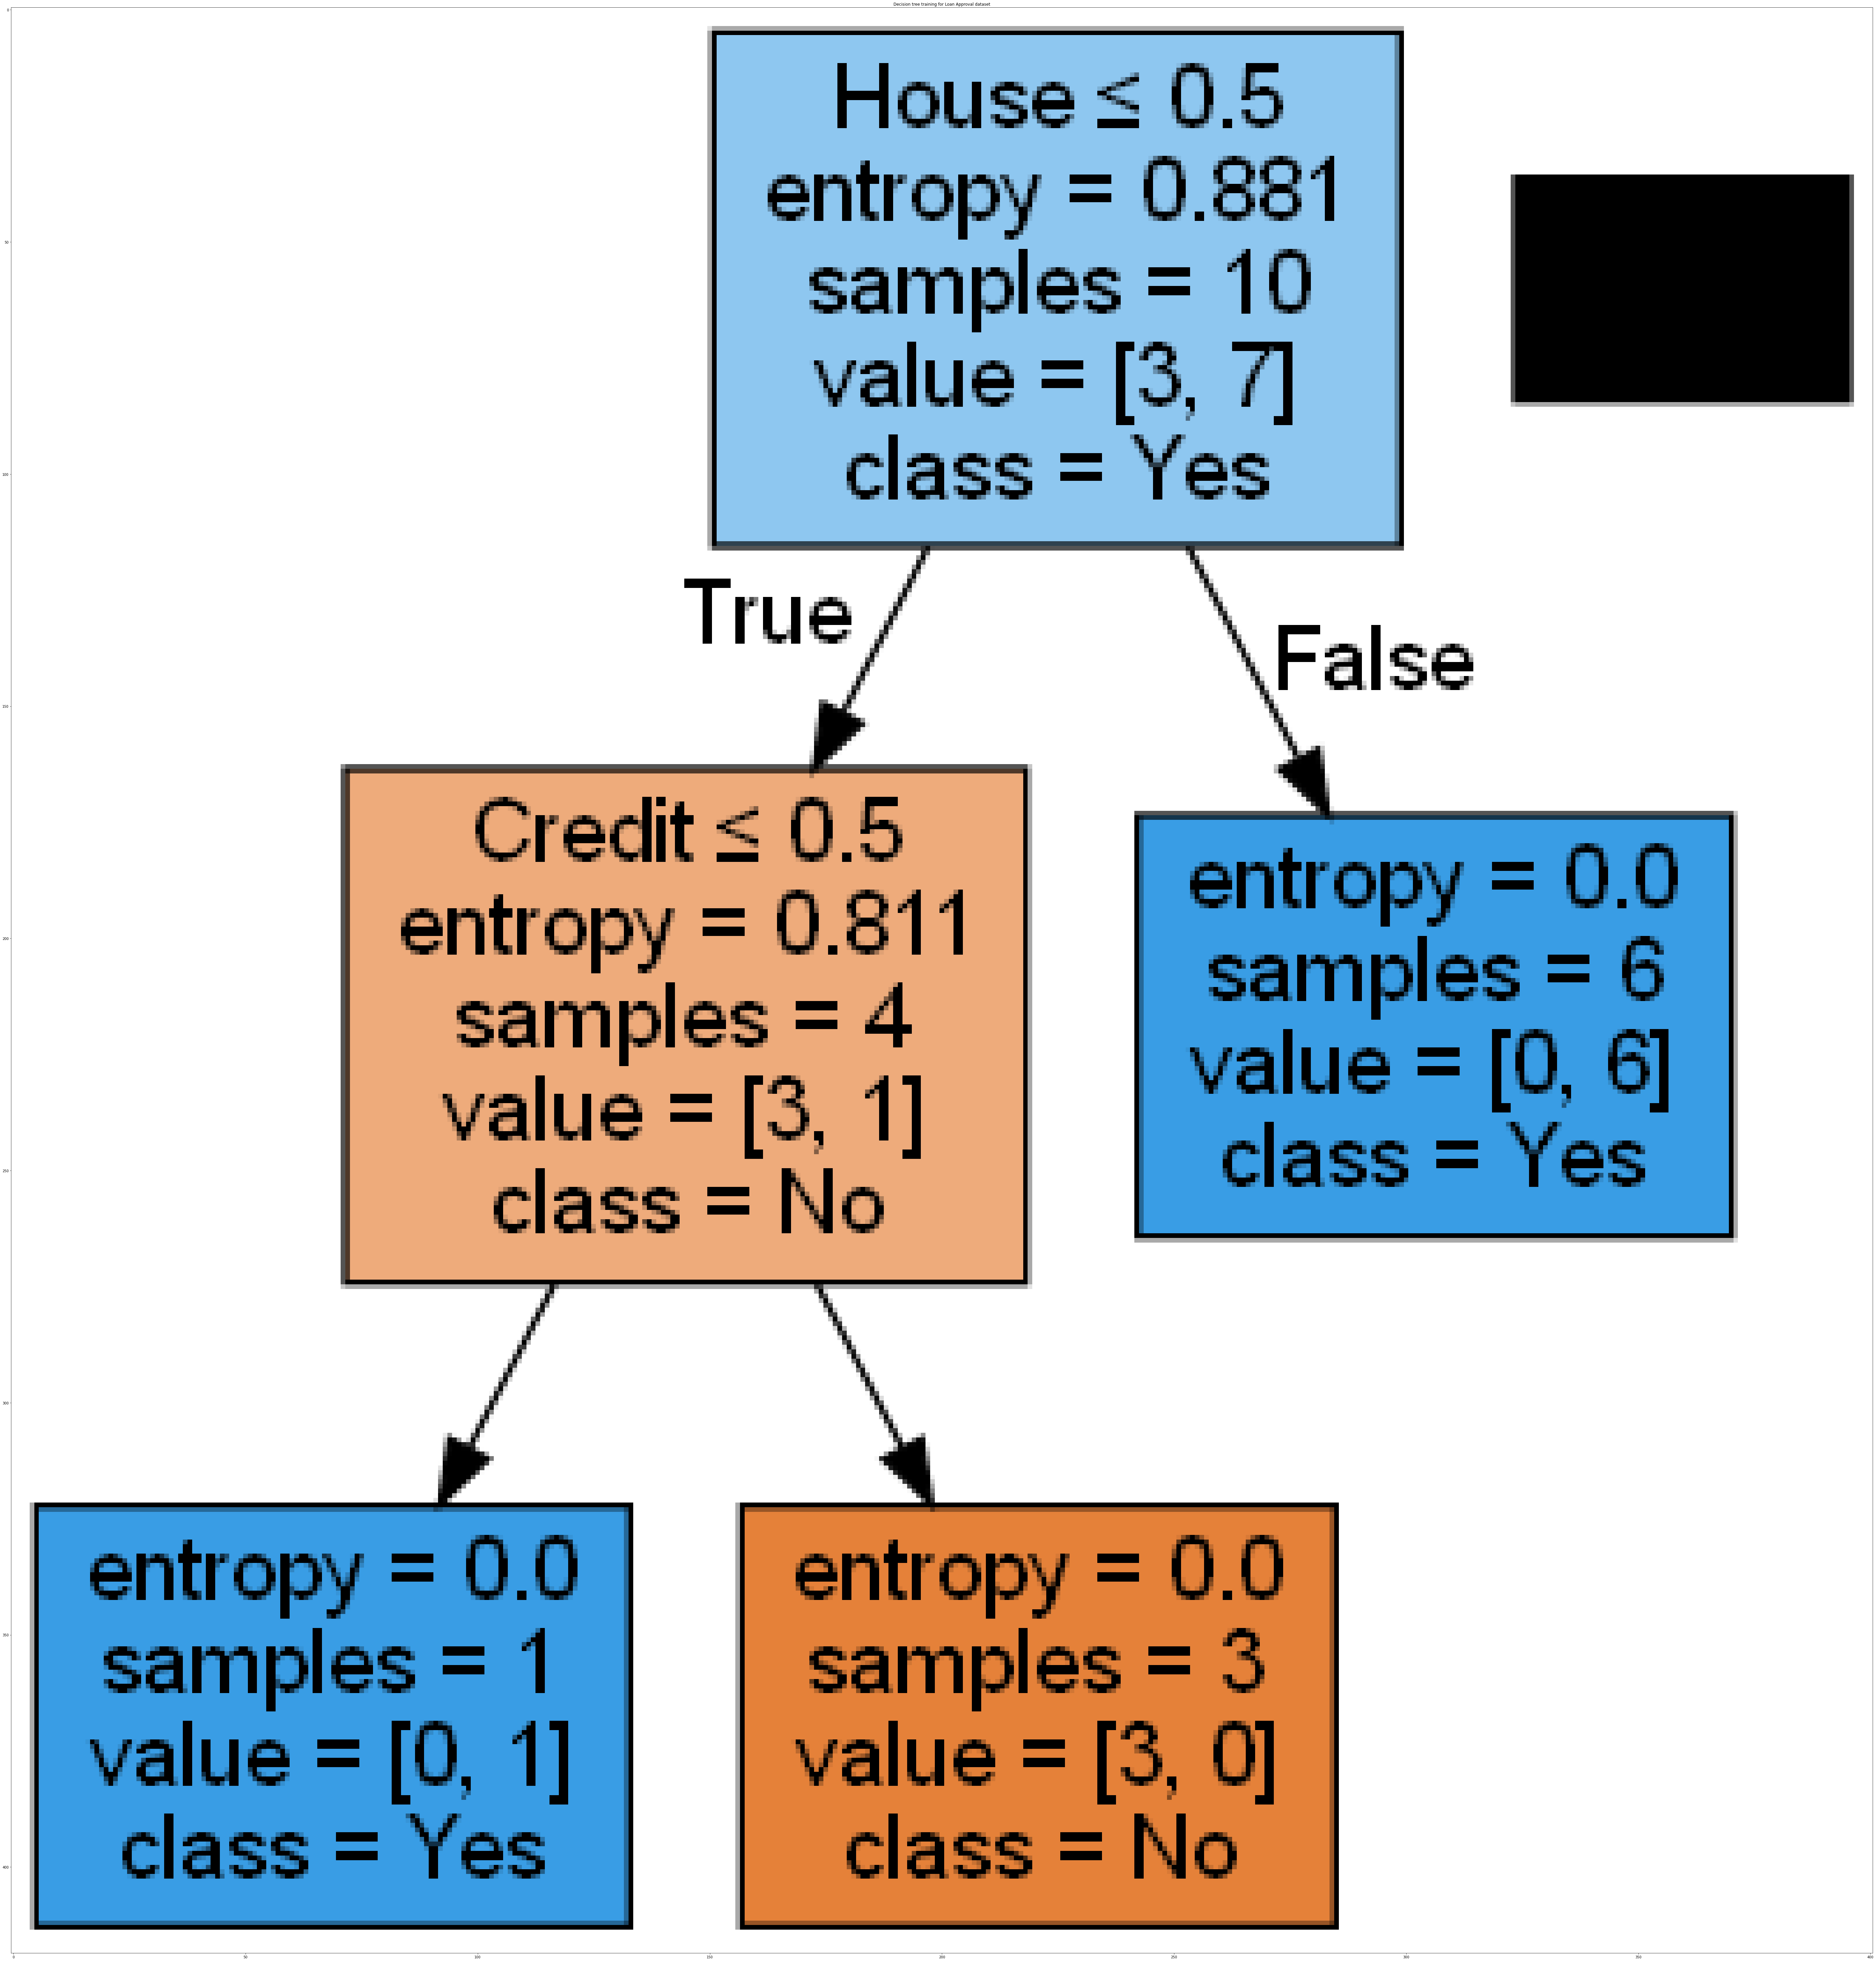

In [174]:
dot_data = StringIO()
filename = "LoanApprovedtree.png" 
targetNames = df["Loan Approved"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_trainset), filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.title("Decision tree training for Loan Approval dataset")
plt.imshow(img,interpolation='nearest')

# (2). Then solve the following problem using the model

In [175]:
#Evaluation of the model
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import jaccard_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import log_loss

# Applying the Jaccard score

In [176]:
yhat_tree=loanTree.predict(X)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.7647058823529411  F1 is 0.8660714285714286
              precision    recall  f1-score   support

          No       0.75      1.00      0.86         6
         Yes       1.00      0.78      0.88         9

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15



array([[6, 0],
       [2, 7]], dtype=int64)

# Applying the Log Loss

In [177]:
# printing the loss functions
pred = loanTree.predict_proba(X_testset)
print('The log loss of the model is:', log_loss(y_testset, pred))

The log loss of the model is: 13.815510557964274
